<a href="https://colab.research.google.com/github/pradyumnac26/Twitter-Sentiment-Analysis/blob/main/tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:

consumerKey = 'eIm3uZZk3u0iqxEdKj9Lr3Jf6'
consumerSecret = 'guSP4VrYgwVzD0QiaWAMtJoESVD2cnC3GEsTP56ZXWpuXYN5I7'
accessToken = '1391239076708188160-GJ2uRRUuMeWh4rR8JhoQrhoIPl3MOW'
accessTokenSecret = 'Y1fRqLoCm8Pjx12x4Uz3ojFmNtl8ADi93KHqOaS5jPGRO'

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:

all_tweets=[]
while True :
  posts = api.user_timeline(screen_name="BillGates",count = 200,lang ="en", tweet_mode="extended")
  if(len(all_tweets)==800):
    break
  all_tweets.extend(posts)
  print('N of tweets downloaded till now {}'.format(len(all_tweets)))

#  Print the last 5 tweets
  #print("Show the 5 recent tweets:\n")
 # i=1
  #for tweet in posts:
   # print(str(i) +') '+ tweet.full_text + '\n')
    #i= i+1


N of tweets downloaded till now 200
N of tweets downloaded till now 400
N of tweets downloaded till now 600
N of tweets downloaded till now 800


In [ ]:
tweet.full_text.encode("utf-8")



NameError: ignored

In [ ]:
userID = "BillGates"
from pandas import DataFrame
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('tweets.csv' ,index=False)
df

,id,created_at,favorite_count,retweet_count,text
0,1400181572796514306,2021-06-02 20:04:35,0,95,RT @MSuzman: Promising news from the @Gavi #CO...
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between @Breakthrough Energy ...
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...
4,1398673403003822081,2021-05-29 16:11:40,0,157,RT @GlobalFund: Stronger collaboration can hel...
...,...,...,...,...,...
795,1288615136777760771,2020-07-29 23:19:24,5629,959,Science and innovation will help us beat COVID...
796,1288606082248486913,2020-07-29 22:43:25,4536,631,It’s important that we continue to follow scie...
797,1288579704203616256,2020-07-29 20:58:36,0,897,"RT @eji_org: ""We all have an obligation, a mis..."
798,1288575466199117831,2020-07-29 20:41:46,3247,390,“I truly believe that if there is faith and ho...


In [ ]:
# Create a dataframe with a column called Tweets
#df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df

,id,created_at,favorite_count,retweet_count,text
0,1400181572796514306,2021-06-02 20:04:35,0,95,RT @MSuzman: Promising news from the @Gavi #CO...
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between @Breakthrough Energy ...
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...
4,1398673403003822081,2021-05-29 16:11:40,0,157,RT @GlobalFund: Stronger collaboration can hel...
...,...,...,...,...,...
795,1288615136777760771,2020-07-29 23:19:24,5629,959,Science and innovation will help us beat COVID...
796,1288606082248486913,2020-07-29 22:43:25,4536,631,It’s important that we continue to follow scie...
797,1288579704203616256,2020-07-29 20:58:36,0,897,"RT @eji_org: ""We all have an obligation, a mis..."
798,1288575466199117831,2020-07-29 20:41:46,3247,390,“I truly believe that if there is faith and ho...


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df

,id,created_at,favorite_count,retweet_count,text
0,1400181572796514306,2021-06-02 20:04:35,0,95,: Promising news from the COVAX AMC Summit as...
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between Energy and the _Comm...
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...
4,1398673403003822081,2021-05-29 16:11:40,0,157,: Stronger collaboration can help countries re...
...,...,...,...,...,...
795,1288615136777760771,2020-07-29 23:19:24,5629,959,Science and innovation will help us beat COVID...
796,1288606082248486913,2020-07-29 22:43:25,4536,631,It’s important that we continue to follow scie...
797,1288579704203616256,2020-07-29 20:58:36,0,897,"_org: ""We all have an obligation, a mission, a..."
798,1288575466199117831,2020-07-29 20:41:46,3247,390,“I truly believe that if there is faith and ho...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,id,created_at,favorite_count,retweet_count,text,Subjectivity,Polarity
0,1400181572796514306,2021-06-02 20:04:35,0,95,: Promising news from the COVAX AMC Summit as...,0.500000,0.350000
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between Energy and the _Comm...,0.000000,0.000000
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...,0.454545,0.136364
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...,0.600000,0.000000
4,1398673403003822081,2021-05-29 16:11:40,0,157,: Stronger collaboration can help countries re...,0.000000,0.000000
...,...,...,...,...,...,...,...
795,1288615136777760771,2020-07-29 23:19:24,5629,959,Science and innovation will help us beat COVID...,0.000000,0.000000
796,1288606082248486913,2020-07-29 22:43:25,4536,631,It’s important that we continue to follow scie...,0.727273,0.268182
797,1288579704203616256,2020-07-29 20:58:36,0,897,"_org: ""We all have an obligation, a mission, a...",0.000000,0.000000
798,1288575466199117831,2020-07-29 20:41:46,3247,390,“I truly believe that if there is faith and ho...,0.000000,0.000000


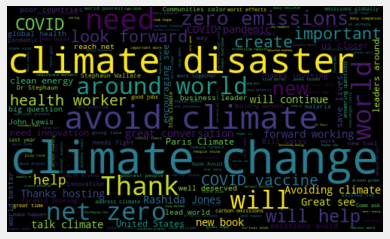

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,id,created_at,favorite_count,retweet_count,text,Subjectivity,Polarity,Analysis
0,1400181572796514306,2021-06-02 20:04:35,0,95,: Promising news from the COVAX AMC Summit as...,0.500000,0.350000,Positive
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between Energy and the _Comm...,0.000000,0.000000,Neutral
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...,0.454545,0.136364,Positive
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...,0.600000,0.000000,Neutral
4,1398673403003822081,2021-05-29 16:11:40,0,157,: Stronger collaboration can help countries re...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
795,1288615136777760771,2020-07-29 23:19:24,5629,959,Science and innovation will help us beat COVID...,0.000000,0.000000,Neutral
796,1288606082248486913,2020-07-29 22:43:25,4536,631,It’s important that we continue to follow scie...,0.727273,0.268182,Positive
797,1288579704203616256,2020-07-29 20:58:36,0,897,"_org: ""We all have an obligation, a mission, a...",0.000000,0.000000,Neutral
798,1288575466199117831,2020-07-29 20:41:46,3247,390,“I truly believe that if there is faith and ho...,0.000000,0.000000,Neutral


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) : Promising news from the  COVAX AMC Summit as they have exceeded today’s fundraising target. This means more people in lo…

2) The pandemic has exacerbated existing racial health inequities in the United States. The Health Equity Tracker is a new tool bringing visibility to disparities in U.S. medicine. 

3) : As our CEO  says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

4) : The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

5) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. 

6) It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the m

In [ ]:

# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) : Black folks have 

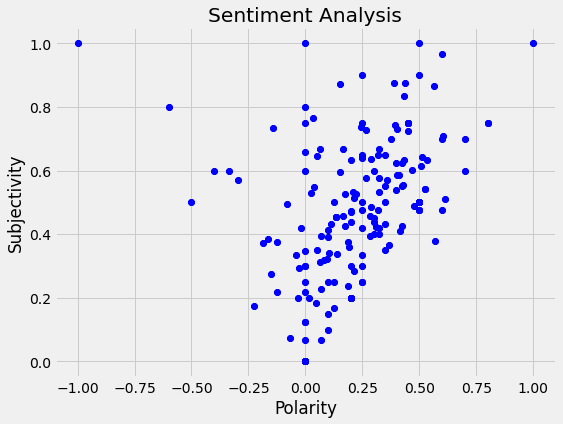

In [ ]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

70.0

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.0

In [ ]:
df['Analysis'].value_counts()

Positive    560
Neutral     160
Negative     80
Name: Analysis, dtype: int64

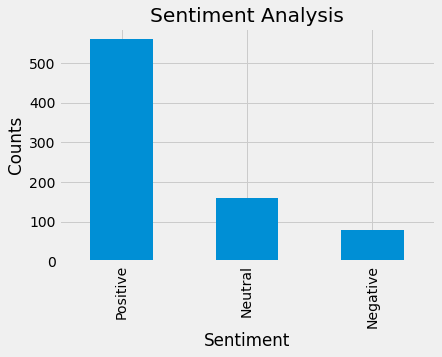

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
df['clean_tweet'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,created_at,favorite_count,retweet_count,text,Subjectivity,Polarity,Analysis,clean_tweet
0,1400181572796514306,2021-06-02 20:04:35,0,95,: Promising news from the COVAX AMC Summit as...,0.500000,0.350000,Positive,Promising news from COVAX Summit they have exc...
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between Energy and the _Comm...,0.000000,0.000000,Neutral,This partnership between Energy _Commission wi...
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...,0.454545,0.136364,Positive,pandemic exacerbated existing racial health in...
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...,0.600000,0.000000,Neutral,Avoiding climate disaster possible governments...
4,1398673403003822081,2021-05-29 16:11:40,0,157,: Stronger collaboration can help countries re...,0.000000,0.000000,Neutral,Stronger collaboration help countries recover ...


In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Promising, news, from, COVAX, Summit, they, h...
1    [This, partnership, between, Energy, _Commissi...
2    [pandemic, exacerbated, existing, racial, heal...
3    [Avoiding, climate, disaster, possible, govern...
4    [Stronger, collaboration, help, countries, rec...
Name: clean_tweet, dtype: object

In [ ]:

# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [promis, news, from, covax, summit, they, have...
1    [thi, partnership, between, energi, _commiss, ...
2    [pandem, exacerb, exist, racial, health, inequ...
3    [avoid, climat, disast, possibl, govern, today...
4    [stronger, collabor, help, countri, recov, fro...
Name: clean_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,created_at,favorite_count,retweet_count,text,Subjectivity,Polarity,Analysis,clean_tweet
0,1400181572796514306,2021-06-02 20:04:35,0,95,: Promising news from the COVAX AMC Summit as...,0.500000,0.350000,Positive,promis news from covax summit they have exceed...
1,1400126638067576833,2021-06-02 16:26:18,1786,260,This partnership between Energy and the _Comm...,0.000000,0.000000,Neutral,thi partnership between energi _commiss will c...
2,1399863361383276545,2021-06-01 23:00:08,1863,234,The pandemic has exacerbated existing racial h...,0.454545,0.136364,Positive,pandem exacerb exist racial health inequ unit ...
3,1398800221132312579,2021-05-30 00:35:35,6047,1014,Avoiding a climate disaster is possible if gov...,0.600000,0.000000,Neutral,avoid climat disast possibl govern today. zero...
4,1398673403003822081,2021-05-29 16:11:40,0,157,: Stronger collaboration can help countries re...,0.000000,0.000000,Neutral,stronger collabor help countri recov from impa...


In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Analysis'], random_state=0)
print(x_train.shape,y_train.shape)


(600, 1192) (600,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
#print('The accuracy of Logistic classifier training set is {:.2f}'.format(logreg.score(x_train,y_train)))
#print('The accuracy of Logistic classifier test set is {:.2f}'.format(logreg.score(x_test,y_test)))
print("accuracy: {}%".format(round(accuracy_score(y_test, pred)*100,2)))
f1_score(y_test, pred,average = 'micro')



accuracy: 97.5%


0.975

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = model.predict(x_test)


In [ ]:
accuracy_score(y_test,pred)

0.975

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()
model2.fit(x_train , y_train)
pred = model2.predict(x_test)
f1_score(y_test,        pred , average = 'micro')

0.9500000000000001

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[ 22,   4,   0],
       [  0,  36,   1],
       [  5,   0, 132]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()
mb.fit(x_train,y_train)
pred = mb.predict(x_test)
#print('The accuracy of mb classifier training set is {:.2f}'.format(mb.score(x_train,y_train)))
print('The accuracy of mb classifier test set is {:.2f}'.format(mb.score(x_test,y_test)))
cm = confusion_matrix(y_test,pred)
cm


The accuracy of mb classifier test set is 0.95


array([[ 22,   4,   0],
       [  0,  36,   1],
       [  5,   0, 132]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
#pipe = Pipeline([('vect', CountVectorizer()),
  #               ('tfidf', TfidfTransformer()),
   #              ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
random=RandomForestClassifier()
model = random.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = confusion_matrix(y_test, prediction)
cm

accuracy: 98.0%


array([[ 22,   0,   4],
       [  0,  37,   0],
       [  0,   0, 137]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
#pipe = Pipeline([('vect', CountVectorizer()),
 #                ('tfidf', TfidfTransformer()),
  #               ('model', DecisionTreeClassifier(criterion= 'entropy',
   #                                        max_depth = 20, 
    #                                       splitter='best', 
     #                                      random_state=42))])
decision=DecisionTreeClassifier()
# Fitting the model
model = decision.fit(x_train, y_train)
# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.0%


In [ ]:
from xgboost import XGBClassifier
decision=XGBClassifier()
# Fitting the model
model = decision.fit(x_train, y_train)
# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 91.5%
